**Мини-проект по кластеризации**

Выполнили:
* Никанорова Дарья
* Чуркина Анна
* Чернявская Екатерина

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from sklearn import decomposition
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [71]:
# считываем данные
df = pd.read_csv("../input/column-3/column_3C_weka.csv")

Уберем из датасета все ненужные переменные

In [ ]:
df_cut=df.drop(["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "class"], axis=1)

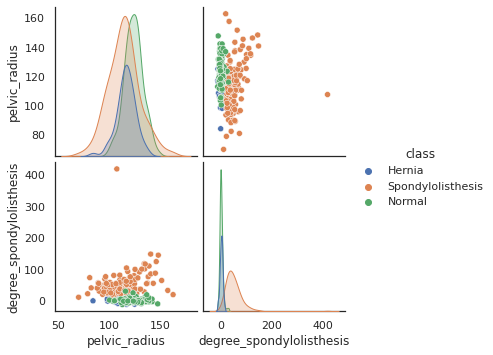

In [72]:
# рисуем скаттерплот
cols_to_draw = ["pelvic_radius", "degree_spondylolisthesis", "class"]
sns.pairplot(df[cols_to_draw], hue="class")

Мы обратили внимание на выброс на скаттерплоте, так как он может нарушить кластеризацию, избавимся от него.

In [74]:
df_cut.loc[df_cut['degree_spondylolisthesis'] == df_cut['degree_spondylolisthesis'].max()]

,pelvic_radius,degree_spondylolisthesis
115,107.690466,418.543082


In [75]:
df_cut = df_cut.drop(115)


После удалния выброса скаттер плот выглядит так:

<AxesSubplot:xlabel='pelvic_radius', ylabel='degree_spondylolisthesis'>

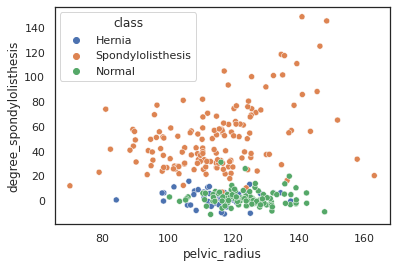

In [76]:
sns.scatterplot(data=df_cut,
                x="pelvic_radius",
                y="degree_spondylolisthesis",
                hue="class")

Попробуем рассчитать оптимальное число кластеров:

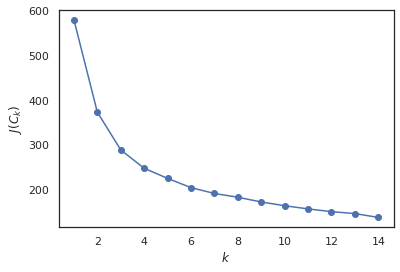

In [77]:
distortions = []
for i in range(1, 15):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(df_cut)
    distortions.append(np.sqrt(km.inertia_))

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

Иcходя из графика, оптимальное число кластеров - 4 или 3.
Попробуем оба варианта и выберем лучший.

Для 4 кластеров:

In [78]:
km = KMeans(n_clusters=4, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(df_cut)

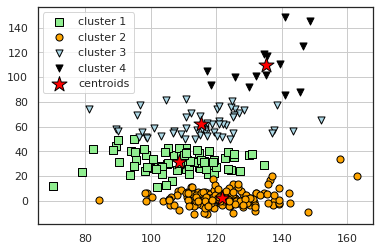

In [79]:
plt.scatter(
    df_cut.values[y_km == 0, 0], df_cut.values[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df_cut.values[y_km == 1, 0], df_cut.values[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    df_cut.values[y_km == 2, 0], df_cut.values[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    df_cut.values[y_km == 3, 0], df_cut.values[y_km == 3, 1],
   s=50, c='black',
    marker='v', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Для 3-х кластеров:

In [80]:
km1 = KMeans(n_clusters=3, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km1 = km1.fit_predict(df_cut)

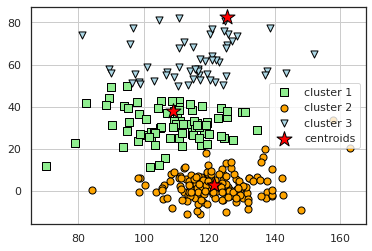

In [81]:
plt.scatter(
    df_cut.values[y_km == 0, 0], df_cut.values[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df_cut.values[y_km == 1, 0], df_cut.values[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    df_cut.values[y_km == 2, 0], df_cut.values[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Теперь попробуем взять иерархическую кластеризацию (complete, median, weighted, single)

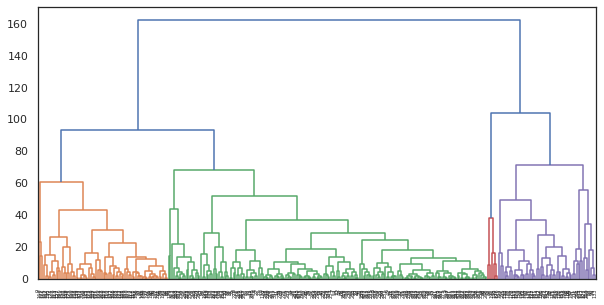

In [82]:
distance_mat = pdist(df_cut)
Z = hierarchy.linkage(distance_mat, 'complete') 
dn = hierarchy.dendrogram(Z, color_threshold=90)

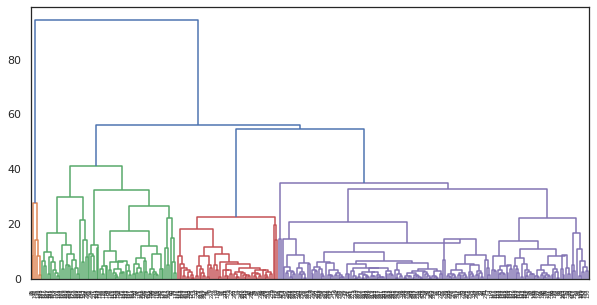

In [83]:
distance_mat = pdist(df_cut)
Z = hierarchy.linkage(distance_mat, 'median') 
dn = hierarchy.dendrogram(Z, color_threshold=51)

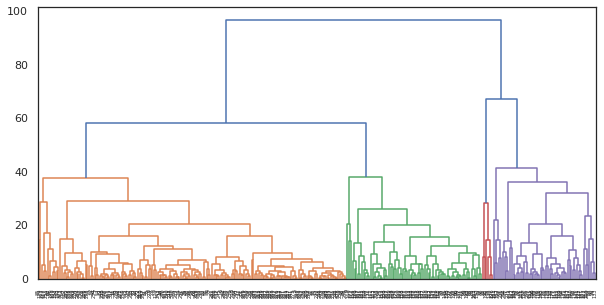

In [84]:
distance_mat = pdist(df_cut)
Z = hierarchy.linkage(distance_mat, 'weighted') 
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=50)

Каждется, наши данные можно разделить на 4 кластера.

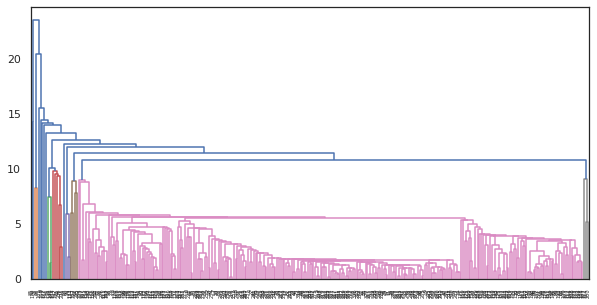

In [85]:
distance_mat = pdist(df_cut)
Z = hierarchy.linkage(distance_mat, 'single') 
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=10)

Посмотрим на метрики для всех алгоритмов:

In [86]:
algorithms = []
algorithms.append(KMeans(n_clusters=4, random_state=1))
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=4, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=4))

data = []
for algo in algorithms:
    algo.fit(df_cut)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y_km, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y_km, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y_km, algo.labels_),
        'Completeness': metrics.completeness_score(y_km, algo.labels_),
        'V-measure': metrics.v_measure_score(y_km, algo.labels_),
        'Silhouette': metrics.silhouette_score(df_cut, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI','Homogenity',
                                           'Completeness', 'V-measure', 'Silhouette'],
                       index=['K-means_4clusters','K-means_3clusters', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means_4clusters,1.000000,1.000000,1.000000,1.000000,1.000000,0.504203
K-means_3clusters,0.810618,0.743761,0.690624,0.811624,0.746251,0.522359
Affinity,0.254805,0.527298,0.922312,0.393676,0.551816,0.361751
Spectral,0.607979,0.746992,0.833728,0.681624,0.750042,0.361064
Agglomerative,0.892885,0.831623,0.832036,0.835845,0.833936,0.508809


**Заключение:**
Исходя из значений метрик для выбранных методов, лучшим является K-means для 4 кластеров. На втором месте -  агломеративная кластеризация.